In [1]:
import pandas as pd
import collections
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
flights = pd.read_csv(r"datasets/487245086_T_DB1B_COUPON.csv",na_values=['--'])
flights = flights[["ORIGIN","DEST","OPERATING_CARRIER","PASSENGERS"]]
flights = flights.dropna()
flights.head()

,ORIGIN,DEST,OPERATING_CARRIER,PASSENGERS
0,ABE,DTW,9E,1.0
1,ABE,ORD,EV,1.0
2,ABE,DTW,EV,1.0
3,ABE,DTW,9E,1.0
4,ABE,ATL,DL,1.0


In [3]:
flights_grouped = flights.groupby(["ORIGIN","DEST","OPERATING_CARRIER"])["PASSENGERS"].sum()
flights_grouped = flights_grouped[flights_grouped>5000]
flights_grouped.describe()

count      679.000000
mean      7896.066274
std       2794.208669
min       5001.000000
25%       5915.000000
50%       7005.000000
75%       9064.500000
max      22633.000000
Name: PASSENGERS, dtype: float64

In [4]:
flights_grouped.head()

ORIGIN  DEST  OPERATING_CARRIER
ABQ     PHX   WN                    5212.0
ANC     SEA   AS                   12437.0
ATL     AUS   DL                    7671.0
        BDL   DL                    6210.0
        BHM   DL                    7208.0
Name: PASSENGERS, dtype: float64

In [5]:
flights = collections.defaultdict(list)

for index, passengers in flights_grouped.iteritems():
    flights[(index[0],index[1])].append((passengers,index[2]))

In [6]:
for origin, dest in [k for k in flights]:
    flights[origin, dest] = flights[origin, dest]
    passenger_total = 0
    maximum = 0
    maximum_carrier = ''
    for passengers, carrier in flights[origin, dest]:
        if int(passengers) > maximum:
            maximum_carrier = carrier
        passenger_total+=int(passengers)
    flights[origin, dest] = (maximum_carrier,passenger_total)

In [7]:
nodes = set()
edges = []
edge_passengers = {}
edge_carrier = {}
for origin, dest in flights:
    carrier = flights[(origin,dest)][0]
    passengers = flights[(origin,dest)][1]
    
    nodes.add(origin)
    nodes.add(dest)
    edges.append((origin,dest))
    edge_passengers[(origin,dest)] = passengers
    edge_carrier[(origin,dest)] = carrier

In [8]:
unique_carriers = list(set([carrier for k,carrier in edge_carrier.items()]))
print(len(unique_carriers))
colors_11 = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6','#6a3d9a','#ffff99']
colordict = {}
for i in range(0,len(unique_carriers)):
    colordict[unique_carriers[i]] = colors_11[i]
print(len(colordict))

11
11


In [9]:
print(colordict)

{'VX': '#a6cee3', 'DL': '#fdbf6f', 'NK': '#ff7f00', 'AA': '#1f78b4', 'HA': '#cab2d6', 'F9': '#b2df8a', 'QX': '#fb9a99', 'B6': '#33a02c', 'UA': '#e31a1c', 'AS': '#ffff99', 'WN': '#6a3d9a'}


In [10]:
G = nx.DiGraph()
for n in nodes:
    G.add_node(n)
for e in edges:
    G.add_edge(e[0],e[1])
# nodesize=[node_volumes[v]/30 for v in G]
edgesize = [edge_passengers[v]/7896 for v in G.edges_iter()]
edgecolor = [colordict[edge_carrier[v]] for v in G.edges_iter()]

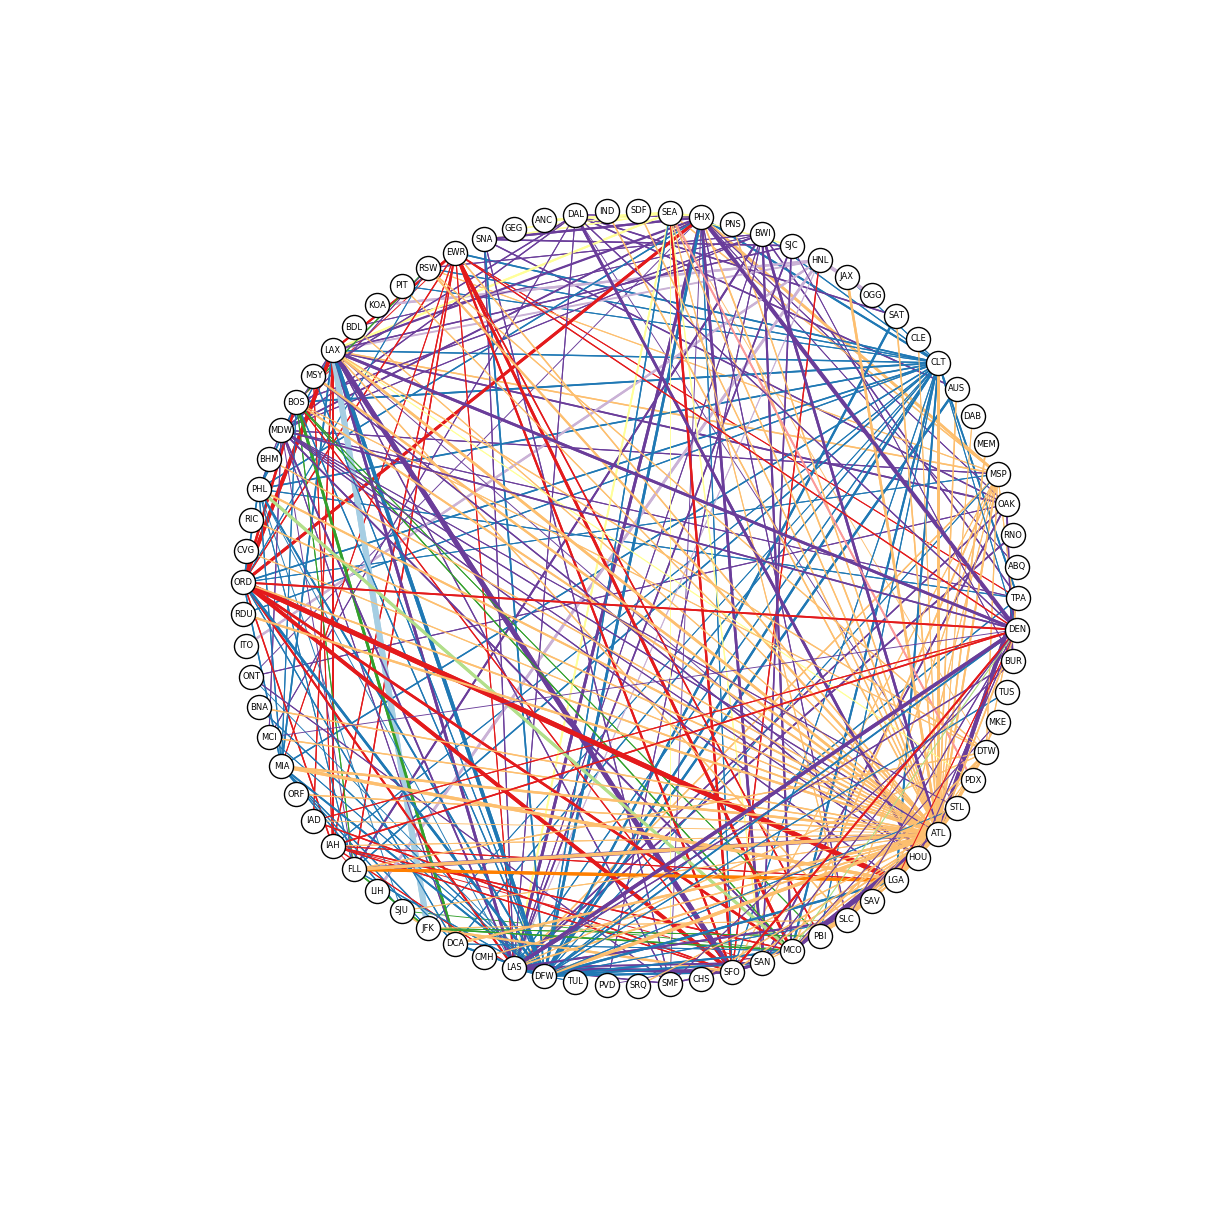

In [11]:
fig, ax = plt.subplots(figsize=(15, 15))
nx.draw_circular(G,ax=ax, edge_color=edgecolor,width=edgesize,node_color='w',arrows=False,with_labels=True,font_size=6)
plt.savefig('flight_circle.pdf')
plt.show()